# Structural Patterns

The creational patterns are guidelines suggested to compose objects in a way that allows to perform new functionalities. Those new functionalities would be harder to do without the new class/function created.

The structural patterns at the same time allows dealing with across entities relationships in an easier and managable way.

In simple words: **How to compose complex objects**

The seven structural patterns available are:
1. Adapter
2. Bridge
3. Composite
4. Decorator
5. Facade
6. Flyweight
7. Proxy

Each of those previous patterns are unique, and can be used in different situations and conditions.

# Facade

**What is the facade?**

A facade is a class that exposes a complex system in a simple way.

**When should we use it?**

We should use it when we have a large process with many attributes and combinations. The goal is to simplify the access of this, and then exposing through a simple way with the most used attributes or combinations.

**Analogy:**

When you call to your bank for something, you will be redirected to a callcenter. The agent who's taking with you, he/she will be your facade. Why? This person will allow you to execute or process whichever requirement you migth have.

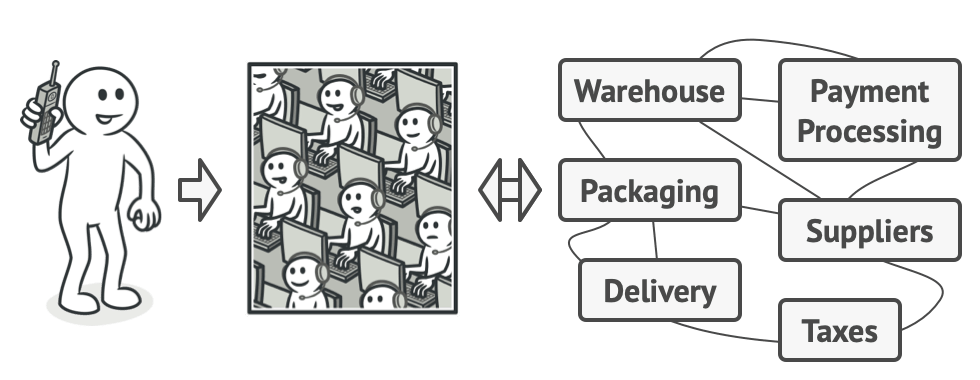

Reference: https://refactoring.guru/design-patterns/facade

**Scenario**

You need to need expose a complex pipeline that have an label encoder, it has a custom scaler, and performs inference over a machine learning model. 

For sake of simplicity, we are not going to be training a label encoder, a scaler, and the model. We will only define some functions which performs the actions.

In [16]:
def label_encoder(text: str) -> int:
    if text == "positive":
        return 100
    elif text == "neutral":
        return 50
    elif text == "negative":
        return 10

In [17]:
def custom_scaler1(value: int) -> float:
    return (value - 10) / (100 - 10)

In [18]:
def custom_scaler2(value: int) -> float:
    return (value - 10) / 200

In [19]:
def random_model(value: float) -> float:
    if value > 0.5:
        return 1.0
    else:
        return 0.0

As you saw previously the functions will be used to emulate the behavior of the different machine learning process.

**Important note:** Most of the GoF examples are done in classes, but this design pattern can be even simplied in functions.

## Antipattern

If comming back to these days, I would create a function/class that allows the user to perform all possible actions

In [20]:
def run_pipeline(value, scaler: str) -> float:
    labeled = label_encoder(value)
    if scaler == "scaler1":
        scaled = custom_scaler1(labeled)
    elif scaler == "scaler2":
        scaled = custom_scaler2(labeled)
    else:
        raise ValueError("Unknown scaler")
    prediction = random_model(scaled)
    return prediction

In [21]:
prediction = run_pipeline("positive", "scaler1")

In [22]:
prediction

1.0

Why is it here an antipattern introduced? Well, the use must need to know before how the pipeline works out, what is the difference between the `scaler1` and the `scaler2`. That adds an additional complexity for the system execution. The idea of the facade is to expose the components in the most usable and reliable way. If we know that `scaler2` is the most suitable this just be exposed in the facade for the final user.

## Pattern

To solve this, let's going to simplify the pipeline only allowing the final user to introduce the value.

In [23]:
def facade_pipeline(value: str) -> float:
    labeled_value = label_encoder(value)
    scaled_value = custom_scaler2(labeled_value)
    prediction = random_model(scaled_value)
    return prediction

In [24]:
prediction2 = facade_pipeline("positive")

In [25]:
prediction2

0.0

As you saw before, the final facade simplified all work done. As another good suggestion, if you're facade is too long or takes too much input parameters, you're introducing an antipattern.